In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

In [8]:
df_dataset = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

### Outlier treatment

In [9]:
# def get_outliers(df,n,columns):
#     outlier_idx = []
#     # iterate over features(columns)
#     for col in columns:
#         Q1 = np.percentile(df[col].dropna(), 25)
#         Q3 = np.percentile(df[col].dropna(),75)
#         IQR = Q3 - Q1
        
#         outlier_step = 1.5 * IQR
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
#         outlier_idx.extend(outlier_list_col)
#     outlier_idx = Counter(outlier_idx)        
#     multiple_outliers = list( k for k, v in outlier_idx.items() if v > n )
    
#     return multiple_outliers   

# # detect outliers from numerical_columns
# outliers_rows = get_outliers(df_train,2,numerical_columns)
# print("Number of outliers : ", len(outliers_rows))

# # Drop outliers
# df_dataset = df_dataset.drop(outliers_rows, axis = 0).reset_index(drop=True)
train_len = len(df_train)

### EDA

In [10]:
print(df_train.isnull().sum())
print("#########################")
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
#########################
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


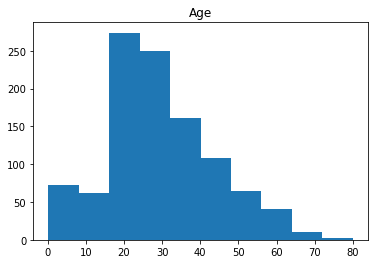

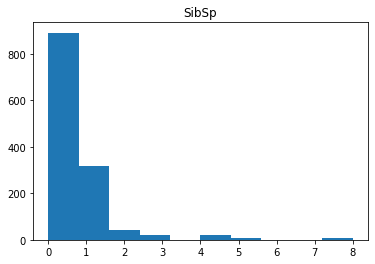

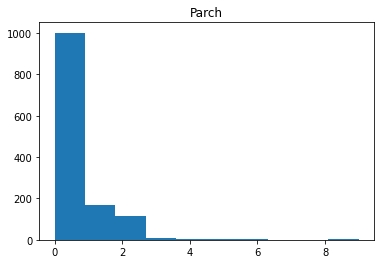

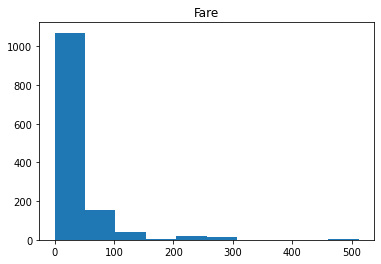

In [11]:
#distribution of numeric data
for col in numerical_columns:
    plt.hist(df_dataset[col])
    plt.title(col)
    plt.show()


<AxesSubplot:>

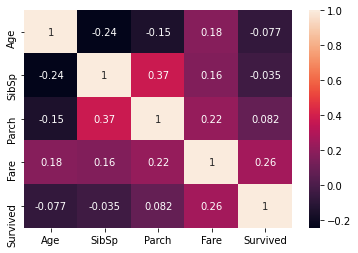

In [12]:
#correlation between numeric data
sns.heatmap(df_dataset[numerical_columns+['Survived']].corr(), annot=True)

In [13]:
#compare avg values for numerical columns for survival
pd.pivot_table(df_dataset, index="Survived", values=numerical_columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


### Comparison of survival for different categorical variables

In [14]:
print(pd.pivot_table(df_dataset, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119


In [15]:
print(pd.pivot_table(df_dataset, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))

Sex       female  male
Survived              
0.0           81   468
1.0          233   109


In [16]:
print(pd.pivot_table(df_dataset, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217


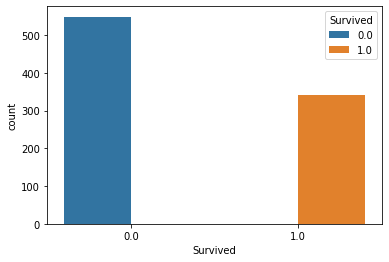

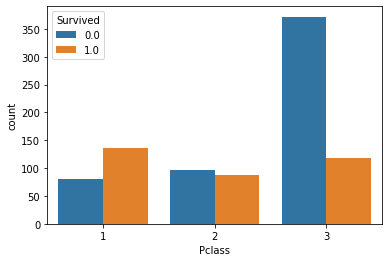

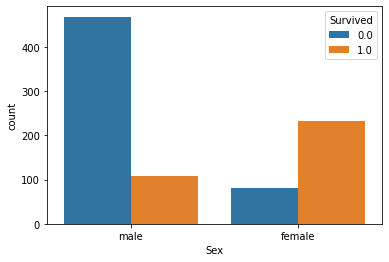

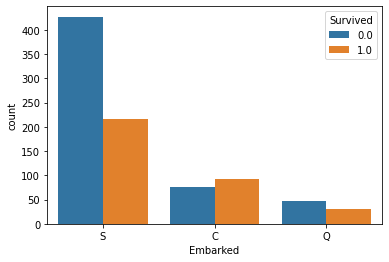

In [17]:
for col in categorical_columns:
    sns.countplot(x=col, hue='Survived', data=df_dataset)
    plt.show()

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


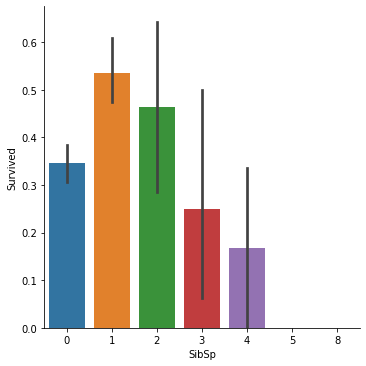

In [18]:
#SibSp vs Survived
sns.factorplot(x="SibSp", y="Survived", data=df_dataset, kind="bar")

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


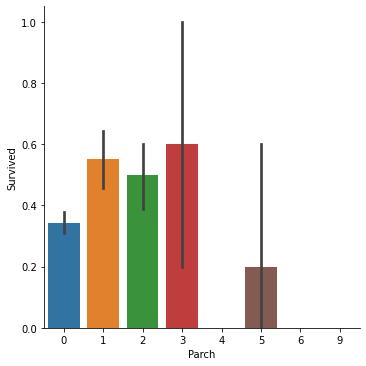

In [19]:
#Parch vs Survived
sns.factorplot(x="Parch", y="Survived", data=df_dataset, kind="bar")

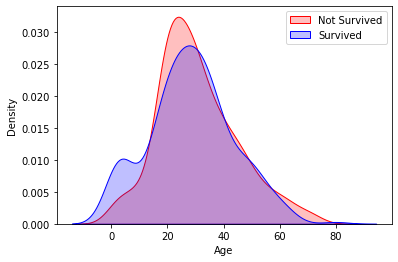

In [20]:
g = sns.kdeplot(df_dataset[(df_train['Survived']==0) & df_dataset['Age'].notnull()].Age, color='Red', shade=True)
g = sns.kdeplot(df_dataset[(df_train['Survived']==1) & df_dataset['Age'].notnull()].Age, color='Blue', shade=True)
g = g.legend(["Not Survived", "Survived"])

In [21]:
df_dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
df_dataset.Fare.fillna(df_dataset.Fare.median(), inplace=True)
df_train.Fare.fillna(df_train.Fare.median(), inplace=True)
df_test.Fare.fillna(df_test.Fare.median(), inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

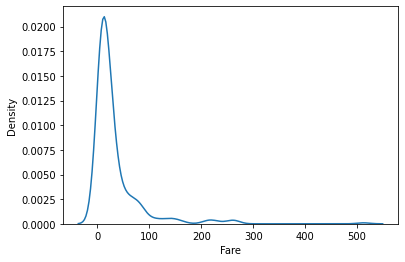

In [23]:
sns.kdeplot(df_dataset.Fare)

In [24]:
df_dataset['Fare'] = df_dataset.Fare.apply(lambda i : np.log(i) if i>0 else 0)
df_train['Fare'] = df_train.Fare.apply(lambda i : np.log(i) if i>0 else 0)
df_test['Fare'] = df_test.Fare.apply(lambda i : np.log(i) if i>0 else 0)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

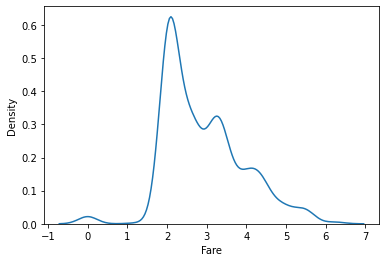

In [25]:
sns.kdeplot(df_dataset.Fare)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

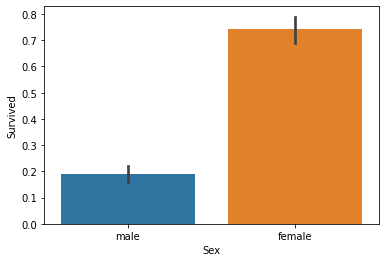

In [26]:
sns.barplot(x="Sex", y="Survived", data=df_dataset)

In [27]:
df_dataset[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


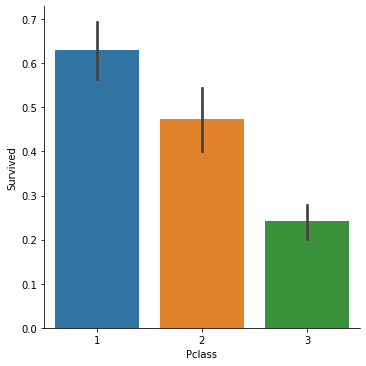

In [28]:
sns.factorplot(x="Pclass", y="Survived", data=df_dataset, kind="bar")

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


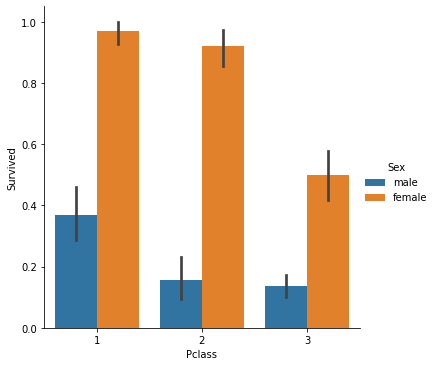

In [29]:
sns.factorplot(x="Pclass", y="Survived", data=df_dataset, kind="bar", hue="Sex")

### Missing values imputation for Embarked

In [30]:
df_dataset["Embarked"].isnull().sum()

2

In [31]:
df_dataset.Embarked.mode()

0    S
dtype: object

In [32]:
df_dataset["Embarked"] = df_dataset.Embarked.fillna("S")
df_train["Embarked"] = df_train.Embarked.fillna(df_train.Embarked.mode())
df_test["Embarked"] = df_test.Embarked.fillna(df_train.Embarked.mode())
df_dataset["Embarked"].isnull().sum()

0

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


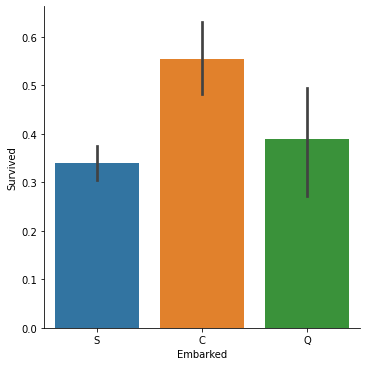

In [33]:
sns.factorplot(x="Embarked", y="Survived", data=df_dataset, kind="bar")

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


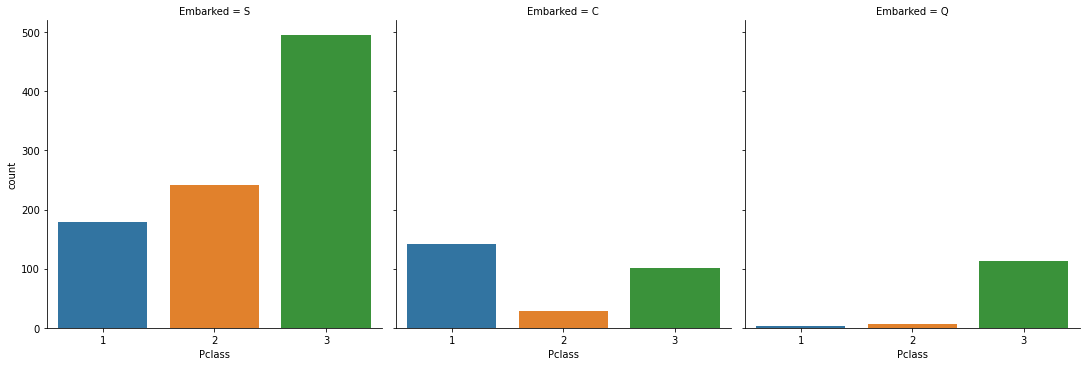

In [34]:
#Above probability of surviving was highest for "C" and here we can see that mostly(count of) 1st class passangers 
# embarked their  journey from "C"(Cherbourg)
sns.factorplot("Pclass", col="Embarked", data=df_dataset, kind="count")

### Missing values imputation for Age

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'poin

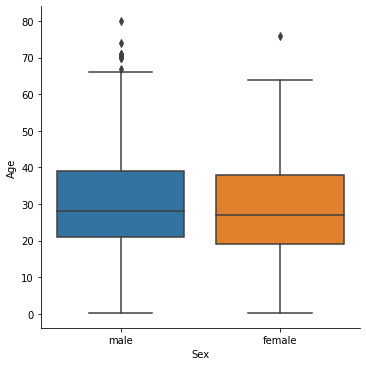

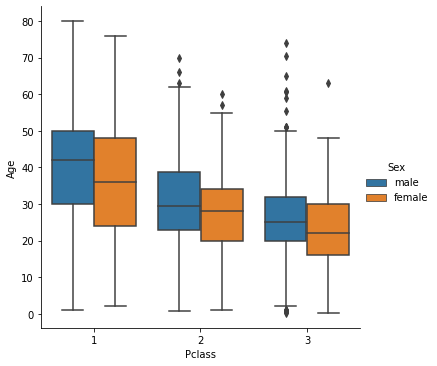

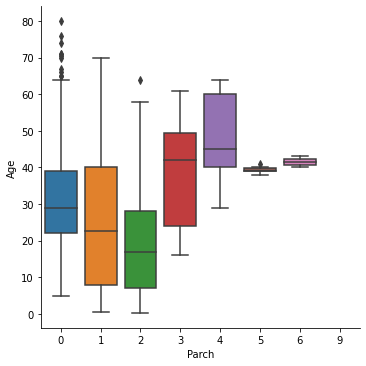

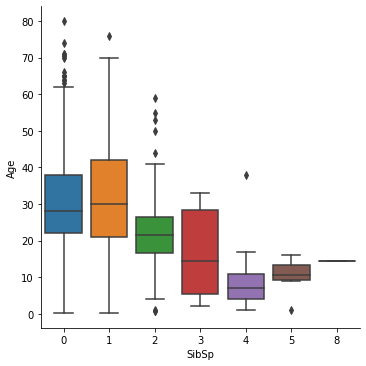

In [35]:
g = sns.factorplot(y="Age", x="Sex", data=df_dataset, kind="box")
g = sns.factorplot(y="Age", x="Pclass",hue="Sex", data=df_dataset, kind="box")
g = sns.factorplot(y="Age", x="Parch", data=df_dataset, kind="box")
g = sns.factorplot(y="Age", x="SibSp", data=df_dataset, kind="box")

In [36]:
df_dataset["Sex"] = df_dataset["Sex"].map({"male": 0, "female": 1})
df_train["Sex"] = df_train["Sex"].map({"male": 0, "female": 1})
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female": 1})

<AxesSubplot:>

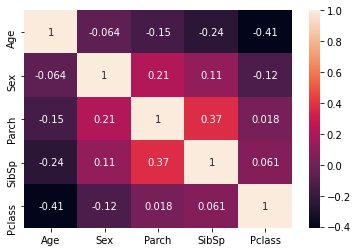

In [37]:
sns.heatmap(df_dataset[["Age", "Sex", "Parch", "SibSp", "Pclass"]].corr(), annot=True)

In [38]:
#Age is correlated to Parch, SibSp, Pclass
idx_Age_null = list(df_dataset[df_dataset["Age"].isnull()].index)
median_age = df_dataset.Age.median()

for i in idx_Age_null:
    estimate_age = df_dataset[(df_dataset["Parch"]==df_dataset["Parch"].iloc[i]) & (df_dataset["SibSp"]==df_dataset["SibSp"].iloc[i]) & (df_dataset["Pclass"]==df_dataset["Pclass"].iloc[i])]["Age"].median()
    if(not np.isnan(estimate_age)):
        df_dataset["Age"].iloc[i] = estimate_age
    else:
        df_dataset["Age"].iloc[i] = median_age




#Age is correlated to Parch, SibSp, Pclass
idx_Age_null = list(df_train[df_train["Age"].isnull()].index)
median_age = df_train.Age.median()

for i in idx_Age_null:
    estimate_age = df_train[(df_train["Parch"]==df_train["Parch"].iloc[i]) & (df_train["SibSp"]==df_train["SibSp"].iloc[i]) & (df_train["Pclass"]==df_train["Pclass"].iloc[i])]["Age"].median()
    if(not np.isnan(estimate_age)):
        df_train["Age"].iloc[i] = estimate_age
    else:
        df_train["Age"].iloc[i] = median_age




#Age is correlated to Parch, SibSp, Pclass
idx_Age_null = list(df_test[df_test["Age"].isnull()].index)
median_age = df_test.Age.median()

for i in idx_Age_null:
    estimate_age = df_test[(df_test["Parch"]==df_test["Parch"].iloc[i]) & (df_test["SibSp"]==df_test["SibSp"].iloc[i]) & (df_test["Pclass"]==df_test["Pclass"].iloc[i])]["Age"].median()
    if(not np.isnan(estimate_age)):
        df_test["Age"].iloc[i] = estimate_age
    else:
        df_test["Age"].iloc[i] = median_age

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [39]:
df_dataset.Age.isnull().sum()

0

### Feature engineering

In [40]:
df_dataset.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [41]:
df_dataset["Title"] = [i.split(",")[1].split(".")[0].strip() for i in df_dataset["Name"]]
df_train["Title"] = [i.split(",")[1].split(".")[0].strip() for i in df_train["Name"]]
df_test["Title"] = [i.split(",")[1].split(".")[0].strip() for i in df_test["Name"]]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'the Countess'),
  Text(16, 0, 'Jonkheer'),
  Text(17, 0, 'Dona')])

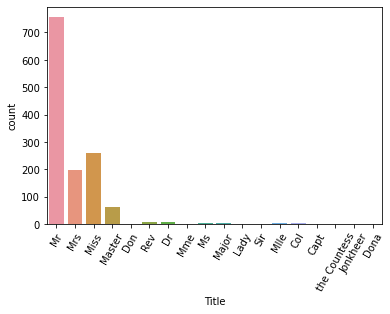

In [42]:
g = sns.countplot(x="Title", data=df_dataset)
plt.xticks(rotation=60)

In [43]:
df_dataset["Title"].replace(['Don', 'Rev' ,'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Rare', inplace=True)
df_dataset["Title"].replace(['Miss', 'Mrs' ,'Ms', 'Mlle', 'Dona', 'Mme'], 'Female', inplace=True)

df_train["Title"].replace(['Don', 'Rev' ,'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Rare', inplace=True)
df_train["Title"].replace(['Miss', 'Mrs' ,'Ms', 'Mlle', 'Dona', 'Mme'], 'Female', inplace=True)

df_test["Title"].replace(['Don', 'Rev' ,'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Rare', inplace=True)
df_test["Title"].replace(['Miss', 'Mrs' ,'Ms', 'Mlle', 'Dona', 'Mme'], 'Female', inplace=True)

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'Rare')])

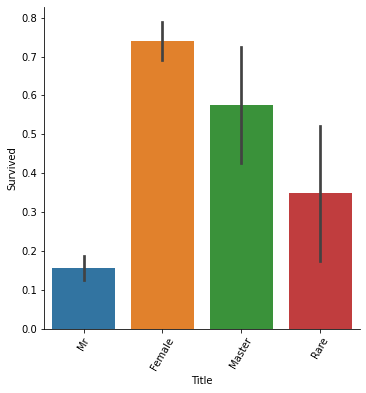

In [44]:
sns.factorplot(x="Title", y="Survived", data=df_dataset, kind="bar")
plt.xticks(rotation=60)

In [45]:
df_dataset["Title"] = df_dataset["Title"].map({"Master": 0, "Female": 1, "Mr": 2, "Rare": 3})
df_dataset["Title"] = df_dataset["Title"].astype(int)
df_dataset.drop(labels=["Name"], axis=1, inplace=True)

df_train["Title"] = df_train["Title"].map({"Master": 0, "Female": 1, "Mr": 2, "Rare": 3})
df_train["Title"] = df_train["Title"].astype(int)
df_train.drop(labels=["Name"], axis=1, inplace=True)

df_test["Title"] = df_test["Title"].map({"Master": 0, "Female": 1, "Mr": 2, "Rare": 3})
df_test["Title"] = df_test["Title"].astype(int)
df_test.drop(labels=["Name"], axis=1, inplace=True)

In [46]:
#FamilySize
df_dataset["Fsize"] = df_dataset["SibSp"] + df_dataset["Parch"] + 1
df_train["Fsize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["Fsize"] = df_test["SibSp"] + df_test["Parch"] + 1

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


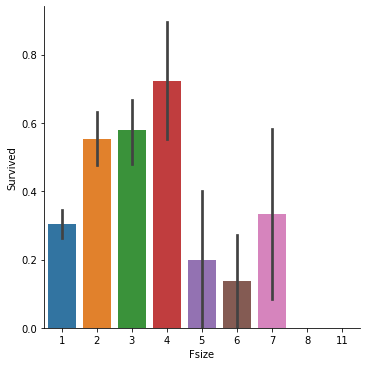

In [47]:
sns.factorplot(x="Fsize", y="Survived", data=df_dataset, kind="bar")

In [48]:
# Create new feature of family size
df_dataset['Single'] = df_dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
df_dataset['SmallF'] = df_dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df_dataset['MedF'] = df_dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_dataset['LargeF'] = df_dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

# Create new feature of family size
df_train['Single'] = df_train['Fsize'].map(lambda s: 1 if s == 1 else 0)
df_train['SmallF'] = df_train['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df_train['MedF'] = df_train['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_train['LargeF'] = df_train['Fsize'].map(lambda s: 1 if s >= 5 else 0)

# Create new feature of family size
df_test['Single'] = df_test['Fsize'].map(lambda s: 1 if s == 1 else 0)
df_test['SmallF'] = df_test['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df_test['MedF'] = df_test['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_test['LargeF'] = df_test['Fsize'].map(lambda s: 1 if s >= 5 else 0)

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'poin

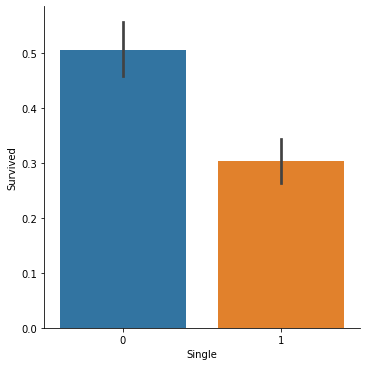

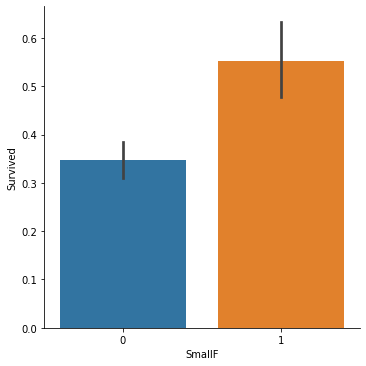

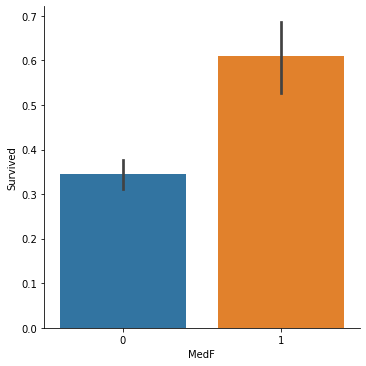

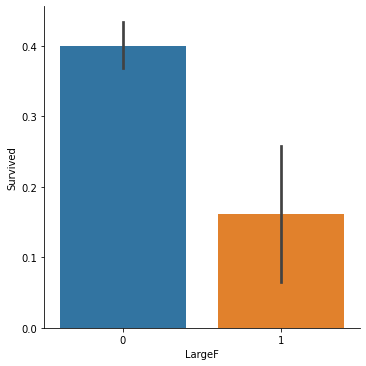

In [49]:
for col in ['Single', 'SmallF', 'MedF', 'LargeF']:
    sns.factorplot(x=col, y="Survived", data=df_dataset, kind="bar")

In [50]:
df_dataset = pd.get_dummies(df_dataset, columns=["Title"])
df_dataset = pd.get_dummies(df_dataset, columns=["Embarked"], prefix="Em")

df_train = pd.get_dummies(df_train, columns=["Title"])
df_train = pd.get_dummies(df_train, columns=["Embarked"], prefix="Em")

df_test = pd.get_dummies(df_test, columns=["Title"])
df_test = pd.get_dummies(df_test, columns=["Embarked"], prefix="Em")

In [51]:
df_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


In [52]:
df_dataset.Cabin.isnull().sum()

1014

In [53]:
#Null in Cabin field means those passangers didn't have any cabin
df_dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df_dataset['Cabin'] ])
df_train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df_train['Cabin'] ])
df_test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df_test['Cabin'] ])

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


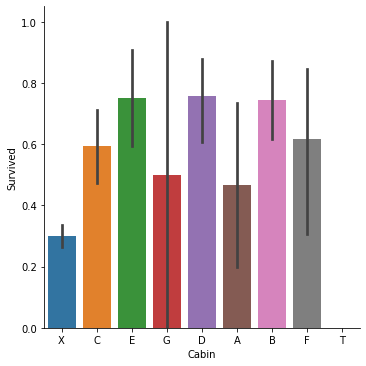

In [54]:
sns.factorplot(x="Cabin", y="Survived", data=df_dataset, kind="bar")

In [55]:
df_dataset = pd.get_dummies(df_dataset, columns=["Cabin"], prefix="Cabin")
df_train = pd.get_dummies(df_train, columns=["Cabin"], prefix="Cabin")
df_test = pd.get_dummies(df_test, columns=["Cabin"], prefix="Cabin")

In [56]:
df_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Fsize,...,Em_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,2,...,1,0,0,0,0,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,2,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,2,...,1,0,0,1,0,0,0,0,0,0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,1,...,1,0,0,0,0,0,0,0,0,1


In [57]:
Ticket = []
for i in list(df_dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df_dataset["Ticket"] = Ticket


Ticket = []
for i in list(df_train.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df_train["Ticket"] = Ticket


Ticket = []
for i in list(df_test.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df_test["Ticket"] = Ticket

In [58]:
df_dataset = pd.get_dummies(df_dataset, columns=["Ticket"], prefix="T")
df_train = pd.get_dummies(df_train, columns=["Ticket"], prefix="T")
df_test = pd.get_dummies(df_test, columns=["Ticket"], prefix="T")

In [59]:
df_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fsize,Single,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,1,0.0,3,0,22.0,1,0,1.981001,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,1,38.0,1,0,4.266662,2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,1,26.0,0,0,2.070022,1,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,1,35.0,1,0,3.972177,2,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,2.085672,1,1,...,0,0,0,0,0,0,0,0,0,1


### Modeling

In [61]:
train = df_dataset[:train_len]
X_test = df_dataset[train_len:]
X_test.drop(labels=["Survived"], axis=1, inplace=True)

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels=["Survived"], axis=1)

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
891,892,3,0,34.5,0,0,2.057860,1,1,0,...,0,0,0,0,0,0,0,0,0,1
892,893,3,1,47.0,1,0,1.945910,2,0,1,...,0,0,0,0,0,0,0,0,0,1
893,894,2,0,62.0,0,0,2.270836,1,1,0,...,0,0,0,0,0,0,0,0,0,1
894,895,3,0,27.0,0,0,2.159003,1,1,0,...,0,0,0,0,0,0,0,0,0,1
895,896,3,1,22.0,1,1,2.508582,3,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,1,3,0,22.0,1,0,1.981001,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,4.266662,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1,26.0,0,0,2.070022,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,35.0,1,0,3.972177,2,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,3,0,35.0,0,0,2.085672,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [66]:
LRC = LogisticRegression(random_state=2)

In [67]:
kfold = StratifiedKFold(n_splits=10)
cross_val_score(LRC, X_train, y = Y_train, scoring="accuracy", cv = kfold, n_jobs=2)
cross_val_score(LRC, X_train, y = Y_train, scoring="accuracy", cv = kfold, n_jobs=2).mean()

0.8238077403245944

In [68]:
LRC.fit(X_train, Y_train)

C:\Users\DIxitSHi\Anaconda3\envs\Training1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=2)

In [69]:
df_pred_LR = pd.DataFrame()
df_pred_LR["PassengerId"] = df_test["PassengerId"] 

In [71]:
df_pred_LR["Survived"] = LRC.predict(X_test)

In [73]:
df_pred_LR.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
df_pred_LR.to_csv("Titanic_pred_LR.csv", index=False)